<a href="https://colab.research.google.com/github/Ater97/DeepLearningKeras/blob/master/Make_Circles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#deep-circles.py

#Imports
from sklearn.datasets import make_circles
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]="2"

#Helper functions

# plot the data on a figure
def plot_data(pl,X,y):
  #plot class where y==0
  pl.plot(X[y==0,0], X[y==0,1], 'ob', alpha=0.5)
  #plot class where y==1
  pl.plot(X[y==1,0], X[y==1,1], 'xr', alpha=0.5)
  pl.legend(['0', '1'])
  return pl

# common function that draws thw decision boundaries
def plot_decision_boundary(model, X, y):
  amin,bmin = X.min(axis=0) - 0.1
  amax,bmax = X.max(axis=0) + 0.1
  hticks = np.linspace(amin,amax,101)
  vticks = np.linspace(bmin,bmax,101)
  
  aa,bb = np.meshgrid(hticks, vticks)
  ab = np.c_[aa.ravel(), bb.ravel()]
  
  # make prediction with the model and reshape the output so contours can plot it
  c = model.predict(ab)
  Z = c.reshape(aa.shape)
  
  plt.figure(figsize=(12, 8))
  # plot the contour
  plt.contourf(aa, bb, Z, cmap='bwr', alpha=0.2)
  # plot the moons of data
  plot_data(plt, X, y)
  
  return plt



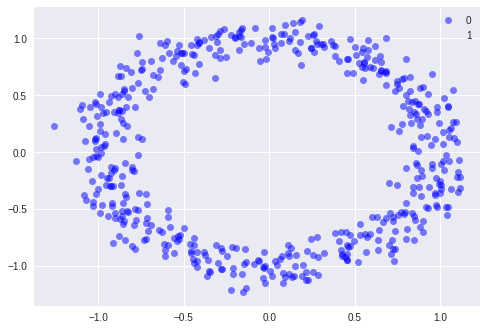

In [4]:

X, y = make_circles(n_samples=1000, factor=.6, noise=0.1, random_state=42)

pl = plot_data(plt, X, y)
pl.show()



300/300 [==============================] - 0s 246us/sample - loss: 0.1408 - acc: 0.9433


Test loss: 0.14084481341143448 Test accurary: 0.9433333


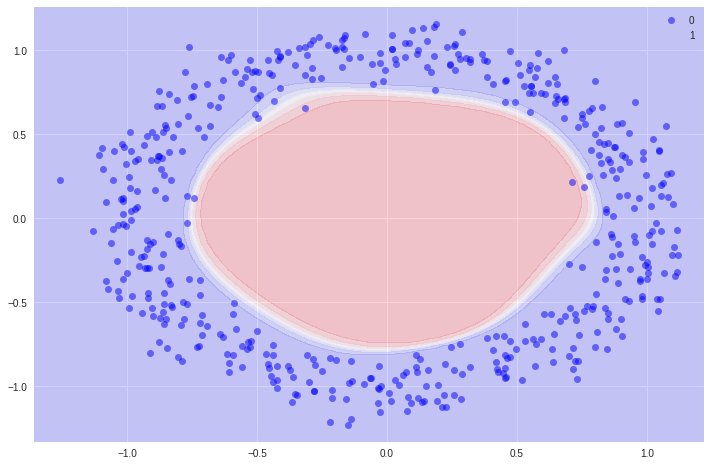

In [10]:
# split the data into training and test sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Create the keras model
#from keras import backend as kbe
#from keras.model import Sequential
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# simple sequential model
model = Sequential()

model.add(Dense(4, input_shape=(2,), activation="tanh"))
model.add(Dense(4, activation="tanh"))


model.add(Dense(1, input_shape=(2,), activation="sigmoid"))
#compile the model minimize corssentopy for a binary. macimize for accuracy
model.compile(Adam(lr=0.05),'binary_crossentropy', metrics=['accuracy'])
#Fit the model with the data from make_blobs, make 100 cycles through the data
model.fit(X_train, y_train, epochs=100, verbose=0)
#get loss and acurracy on test data
eval_result = model.evaluate(X_test, y_test)

print("\n\nTest loss:", eval_result[0], "Test accurary:", eval_result[1])

#plot the decision boundary
plot_decision_boundary(model, X, y).show()



# >= size of input layer AND <= size of output layer
# (2/3 * size of input layer) + size of output layer
# <2 * size of input layer